<a href="https://colab.research.google.com/github/kaarthikalagappan/ai_course_projects/blob/master/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## General Concepts



Before this class, I was using artificial intelligence and machine learning interchangeably. I learned that artificial intelligence is more of a general term that encompasses machine learning and deep learning. It can be said that artificial intelligence is the field of computer science that encompasses different areas of creating intelligent machine that mimic a human's activities and decision making abilities.



**Note before we move on**: the code snipped used in this notebook are from Dr. Pawel Wocjan's notebooks on machine learning topics and from my own homework program

Of *AI*, symbolic AI (or GOFAI) is representing concepts so that it's easily understood by humans. Opposed to that is non-symbolic AI is when we, the humans, provide raw data to the machine and making it come up with the rules and pattern. 
The latter part is what we generally call *Machine Learning*. Machine learning is where the machine comes up with the rules after figuring out a pattern, and using those rules it tries to predict the output when given new input.

*Deep learning* is a subset of AI that is usually built from neural networks that trains with a lot of examples to come up with the right set of 'rules'. We can train it to recognize a specific thing by exposing the model to a wide variety of examples. A model is an algorithm we design to learn the pattern and predict or guess the right output after training.

In this, supervised machine learning is when we provide the model with example inputs and expected outputs and 'supervise' the model to train itself to predict the right output when we give a similar input. As expected, unsupervised learning is when we feed the model with examples but don't give it a list of expected outputs



## Basic concepts

In machine learning, training is what we use to say that we are making a model learn to recognize a pattern and predict the result. There are two main type of models: **regression** and **classification**. Regression models answers question on a 'percentage of sureness' level, such as "How full will this garage get on a Tuesday", while classification models are more for yes-or-no questions such as "This is a dog picture or a cat picture".


### Linear regression

In simple terms, linear regression tries to find a relationship between a set of variables using the given data, usually by trying to fit it in a linear equation

$$y = mx + b$$

where $y$ would be the value we will try to predict after training, $b$ is the y-intercept value but known as the **bias** variable in ML, $m$ is the slope of the equation, it is better known as the '**weight**' for the equation, and $x$ is our input value or features in ML linguistics.


When we train we usually adjust the weights and bias of the equation (or individual weights of specific features) so that the output value is closer to the right output (that we provide). We do a lot of iterations of this with multiple examples in order to fine-tune it. Linear regression uses a squared error loss function to calculate it's loss value (how much the predicted output was different from the actual output). It subtracts the predicted value from the actual output and squares it ($(y - y_{hat})^2)$, where **$y_{hat}$** is our prediction value whose equation is

$$y_{hat} = b + w_1x_1$$

$w_1$ is the weight of the feature $x_1$ and $b$ is the bias.


We use **gradient descent** to adjust these values ($b$ and $w$) so that it's closer to the actual outcome. We take the gradient of the loss function (mentioned above) with respect to the weights ($w$). The idea is that in most cases the loss function, when graphed, is in the shape of a convex. So with gradient loss, the gradient will always point towards the direct of the steepest slope, and we want to move away from that side towards the bottom of the convex (we change the weights at the rate/amount we specify, known as the learning rate). This way we can reduce the loss and get a better prediction next iteration.

Once we train the model to get the right or close enough bias and weight term, we can give it a random input variable ($x$) and expect to get an answer that will be right or very close to the right answer.

For example, in this follow code block we creating a function to generate random data and plot them and see the true line of the data:


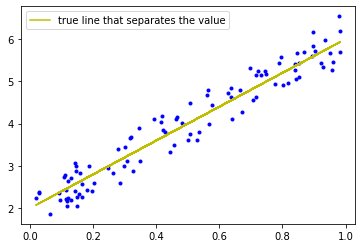

In [111]:
import numpy as np
import random

def get_random_data(m, w = 4, b = 2, mu = .29, sigma = .15):
    data = np.zeros(shape=(m, 2))
    labels = np.zeros(shape=(m, 1))
    x_1_arr = np.zeros(shape=(m, 1))
    x_2_arr = np.zeros(shape=(m, 1))
    for i in range(m):
        rnd = random.random()
        if rnd < 0.5:
            c = 0
        else:
            c = 1
        x_1 = np.random.uniform(0, 1)
        n = np.random.normal(mu, sigma)
        x_2 = (w * x_1) + b + ((-1)**c * n)
        data[i] = [x_1, x_2]
        labels[i] = c
        x_1_arr[i] = x_1
        x_2_arr[i] = x_2
    return data, labels, x_1_arr, x_2_arr

def display_random_data(data, labels, logistic=False):
    x, y = data.T
    for i in range(100):
        if logistic:
            if labels[i] == 1:
                plt.plot(x[i], y[i], "r.")
            else:
                plt.plot(x[i], y[i], "b.")
        else:
            plt.plot(x[i], y[i], "b.")

    y_2 = 4 * (x) + 2
    plt.plot(x[:100], y_2[:100], "y-", label="true line that separates the value")

data, labels, x_1, x_2 = get_random_data(100)
display_random_data(data, labels)
plt.legend()


In the graph above we can see that given a set of data points, there is a yellow line that identifies the pattern between the data points and fits right in between all of them so the loss between all the datapoints from the 'center' is equal. This is what we expect to achieve in linear or logistic regression mode. Note that the above graph is not from a trained model, rather just to demonstrate what we can expect from *a regression model*.

### Logistic regression

While linear regression is used to get predictions as probabilities such getting the possibility of the garage being full, logistic regression is used to categorize the input such as categorize whether the input is a dog or a cat. One of the major difference between the two in how they are built is that a logistic regression model is passed through a sigmoid activation function to map it's value between 0 and 1. The results from the **sigmoid activation** can be used to categorize the input in an yes or no style (any value less than 0.5 from the sigmoid function will be turned into 0 and any value 0.5 or above is turned into 1).

Linear regression outputs a wide range of values, the square loss function can be used to calculate the loss. Since logistic regression usually outputs a value between 0 and 1, the binary cross-entropy loss can be utilized to get a better loss reading.

A graph to represent this:

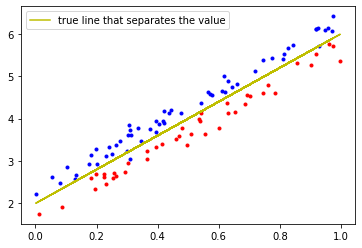

In [112]:
data, labels, x_1, x_2 = get_random_data(100)
display_random_data(data, labels, logistic=True)
plt.legend()


The above graph is similar to the linear regression one; we modified it to categorize the values so that any value above the line belongs to a category, category A, while everything below belongs to another category, category B. In that case, with a logistic regression model we can train our it so that if it predicts a value above the line it will consider it to be of category A while if the value is below the line it will considered to belong to category B.

## Building a model

Convolutional Neural Network is a type of model in the deep learning section that primarily focuses on analyzing images. Usually CNNs contain an input (matrix) or **feature** maps that would be an image, and a set of filters or **kernel maps** (also called as features maps) that would be applied to the input to get the desired output (called the activation map).

The input size of the input is the height and width of the images and how many channels (or depth) it has (black and white pictures have 1 channel to specify how gray an area is, and colored images have 3 channels for red, green, and blue layers). The kernel filter is also specified by height and width. We usually need to specify how many input channels and output channels and how many channels are there in the kernel matrix (usually is equal to the number of channels in the image).


### Convolution Example

We will see how a convolution is performed given an input matrix and a kernel matrix that we want to apply to the input matrix. The kernel matrix is placed over the input matrix and that area is multiplied with the kernel matrix (dot product) and reduced to one number. Then the kernel moves by the stride amount and repeats it.  Note: this implementation takes in only square matrices for simplicity.

In [0]:
class CustomException(Exception):
    pass

class Incompatible(Exception):
    def __init__(self, msg):
        # Error message is stored in msg
        self.msg = msg
debug=False

def conv2d(input_mat, kernel_mat):
    if debug:
        print("input matrix shape: " + str(input_mat.shape))
        print("input matrix: \n" + str(input_mat))
        print("kernel matrix shape: " + str(kernel_mat.shape))
        print("kernel matrix: \n" + str(kernel_mat))
    
    #Since convolution requires us to rotate the matrix 180 degrees
    kernel_mat = np.rot90(np.rot90(kernel_mat))

    if(input_mat.ndim <= 2):
        (height,width) = input_mat.shape
        channels = 1
    else:
        (height,width,channels) = input_mat.shape
    
    if(height != width):
        raise Incompatible("Input is not a square matrix")
    if(height < len(kernel_mat)):
        raise Incompatible("Kernel matrix is bigger than input matrix, the result would be empty")

    #if it's always going to be square matricies, can use either height or width
    output_size = height-len(kernel_mat)+1

    output_mat = np.zeros((output_size, output_size))
    for h in range(output_size):
        for w in range(output_size):
            # commented out since our depth is going to be only one
            # if channels > 1:
            #     for c in range(channels):
            #         multiplied = np.multiply(input_mat[h:h+len(kernel_mat), w:w+len(kernel_mat), c], kernel_mat)
            #         added = np.sum(multiplied)
            #         output_mat[h][w] = output_mat[h][w]+added
            # else:
            multiplied = np.multiply(input_mat[h:h+len(kernel_mat), w:w+len(kernel_mat)], kernel_mat)
            added = np.sum(multiplied)
            output_mat[h][w] = added
    if debug:
        print("output matrix shape: " + str(output_mat.shape))
        print("resulting matrix after convolution: \n" + str(output_mat))
        print("\n")
    return output_mat


The above code defines the function that will perform the convolutions on the input matrix. Here are few examples:

In [91]:
debug=True #turn off debug to not see output matricies

input_mat = np.array([[1,1,1,0,0], [0,1,1,1,0], [0,0,1,1,1], [0,0,1,1,0], [0,1,1,0,0]])

# Common image kernels used with image convolution:
kernel_mat = np.array([[1,0,1], [0,1,0], [1,0,1]])
# kernel_mat = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
# kernel_mat = np.array([[(1/9),(1/9),(1/9)],[(1/9),(1/9),(1/9)],[(1/9),(1/9),(1/9)]])

output_mat = conv2d(input_mat, kernel_mat)

input_mat = np.array([[1,2,3,4,0], [4,3,2,1,0], [9,8,7,6,0], [9,8,7,6,0], [5,4,6,7,0]])
kernel_mat = np.array([[0,0,0], [0,1,0], [0,0,0]])

output_mat = conv2d(input_mat, kernel_mat)

input_mat = np.array([[1,1,1,0,0], [0,1,1,1,0], [0,0,1,1,1], [0,0,1,1,0], [0,1,1,0,0]])
kernel_mat = np.array([[1]])

output_mat = conv2d(input_mat, kernel_mat)

input matrix shape: (5, 5)
input matrix: 
[[1 1 1 0 0]
 [0 1 1 1 0]
 [0 0 1 1 1]
 [0 0 1 1 0]
 [0 1 1 0 0]]
kernel matrix shape: (3, 3)
kernel matrix: 
[[1 0 1]
 [0 1 0]
 [1 0 1]]
output matrix shape: (3, 3)
resulting matrix after convolution: 
[[4. 3. 4.]
 [2. 4. 3.]
 [2. 3. 4.]]


input matrix shape: (5, 5)
input matrix: 
[[1 2 3 4 0]
 [4 3 2 1 0]
 [9 8 7 6 0]
 [9 8 7 6 0]
 [5 4 6 7 0]]
kernel matrix shape: (3, 3)
kernel matrix: 
[[0 0 0]
 [0 1 0]
 [0 0 0]]
output matrix shape: (3, 3)
resulting matrix after convolution: 
[[3. 2. 1.]
 [8. 7. 6.]
 [8. 7. 6.]]


input matrix shape: (5, 5)
input matrix: 
[[1 1 1 0 0]
 [0 1 1 1 0]
 [0 0 1 1 1]
 [0 0 1 1 0]
 [0 1 1 0 0]]
kernel matrix shape: (1, 1)
kernel matrix: 
[[1]]
output matrix shape: (5, 5)
resulting matrix after convolution: 
[[1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0.]]




You can also view this Gif from Towards Data Science to visualize convolution: https://miro.medium.com/max/1070/1*Zx-ZMLKab7VOCQTxdZ1OAw.gif

### Building a model from scratch

Now on to build our own mode. The Keras library can be used to build it from scratch. An example is shown below:

In [43]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

from keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(rescale=1./255)

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_cat_fnames.sort()
train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()

train_generator = generator.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = generator.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)


--2020-04-25 02:27:15--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.128, 2a00:1450:4013:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   199MB/s    in 0.3s    

2020-04-25 02:27:16 (199 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [44]:
from keras import layers
from keras import models

model = models.Sequential()
# conv layers
# 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
# 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
# 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
# 4
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
# dense layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 15, 15, 128)      

In the above code we downloaded some test images and built a model whose input size we specify to be 150 x 150 pixels and has 3 channels and it's kernel size to be 3x3. We then add a **maxpooling** layer that reduces the size by half. 
More about maxpooling in the next section. 

And when we finally want to process at the maps that we have computed to identify and classify, we will flatten the layers so we can pass them to the fully-connected layers, also known as densely connected layers (those layers won't take multiple-dimensional layers). These layers take the input and classify them and output the features of the image from the input.

### Maxpooling

When we apply the filter to the image, the output map will have features would be very localized, so if given a new image the model would have a hard time detecting what we want it to detect if the object isn't the same place as other pictures. In order to avoid this, we want to decentralize those features by generalizing the position in the output map. The maxpooling layer does this by taking the maximum values of an area (area of size that we specify, 2x2 in the model we built) and making that into a new matrix that half the size of the input (since our maxpool window is 2x2).

The following code will show a simple implementation of a maxpool layer for better understanding. We take a window of values from the input matrix (size of the window is provided, square in this case) and choose the largest value in that window and retain only that in the new matrix. Note: this implementation takes in only square matrices for simplicity.

In [0]:
def maxpooling2d(input_mat, s):
    
    if debug:
        print("maxpool window: " + str(s))
        print("input matrix shape: " + str(input_mat.shape))
        print("input matrix: \n" + str(input_mat))

    if(input_mat.ndim <= 2):
        (height,width) = input_mat.shape
        channels = 1
    else:
        (height,width,channels) = input_mat.shape

    if(height != width):
        raise Incompatible("Input is not a square matrix")
    if(height < s):
        raise Incompatible("Maxpool window is bigger than input matrix")

    #if it's always going to be square matricies
    output_size = int(np.floor((min(height,width))/s))

    output_mat = np.zeros((output_size, output_size))
    for h in range(output_size):
        for w in range(output_size):
            if channels > 1:
                for c in range(channels):
                    max_value = input_mat[h*s:h*s+s, w*s:w*s+s, c].max()
                    output_mat[h][w] = output_mat[h][w]+max_value
            else:
                max_value = input_mat[h*s:h*s+s, w*s:w*s+s].max()
                output_mat[h][w] = max_value
    
    if debug:
        print("output matrix shape: " + str(output_mat.shape))
        print(str(output_mat))
        print("\n")
    return output_mat


Some examples to see how it works

In [98]:
debug = True

input_mat = np.array([[1,1,1,0,0], [0,1,1,1,0], [0,0,1,1,1], [0,0,1,1,0], [0,1,1,0,0]])
output_mat = maxpooling2d(input_mat, 4)

input_mat = np.array([[1,1,1,0,0], [0,1,1,1,0], [0,0,1,1,1], [0,0,1,1,0], [0,1,1,0,0]])
output_mat = maxpooling2d(input_mat, 2)

input_mat = np.array([[1,2,3,4,0], [4,3,2,1,0], [9,8,7,6,0], [9,8,7,6,0], [5,4,6,7,0]])
output_mat = maxpooling2d(input_mat, 2)


maxpool window: 4
input matrix shape: (5, 5)
input matrix: 
[[1 1 1 0 0]
 [0 1 1 1 0]
 [0 0 1 1 1]
 [0 0 1 1 0]
 [0 1 1 0 0]]
output matrix shape: (1, 1)
[[1.]]


maxpool window: 2
input matrix shape: (5, 5)
input matrix: 
[[1 1 1 0 0]
 [0 1 1 1 0]
 [0 0 1 1 1]
 [0 0 1 1 0]
 [0 1 1 0 0]]
output matrix shape: (2, 2)
[[1. 1.]
 [0. 1.]]


maxpool window: 2
input matrix shape: (5, 5)
input matrix: 
[[1 2 3 4 0]
 [4 3 2 1 0]
 [9 8 7 6 0]
 [9 8 7 6 0]
 [5 4 6 7 0]]
output matrix shape: (2, 2)
[[4. 4.]
 [9. 7.]]




You can also view this Gif of maxpooling from Google Developers to easily visualize it: https://developers.google.com/machine-learning/practica/image-classification/images/maxpool_animation.gif

## Compiling a model 

After we build the model, we need to compile it with extra parameters that define how we will train the model. There are four main parameters that compiling a model will take: it asks what type of loss function, optimizer (learning rate), and what type of metric it would analyze. 

The loss function as we discussed before tells us how much the predicted value differs from the actual outcome. This helps us understand how close or how far the model is from predicting the right value, which we can then use to adjust the weights and the bias to reduce the loss using the optimizer. The optimizer is what controls how the weights of the model are updated in order to reduce the loss.



**The learning rate** is how large or how small of a change we want to make to the weights when updating them. Usually smaller learning rate tends to lead to a better or more accurate model but might take a lot of time while larger learning rates tends to get to the good version of the model in a short time but has the chance of overshooting the weights, which can lead to the weights diverging and not converging. Metrics are what we use to evaluate the model when training. It should be said that the results of metrics aren't used to update the model like the loss (the loss can be considered a metric).

The following is the code we use to compile our model.


In [0]:
from keras import optimizers

model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=1e-4), #use a learning rate of 1e-5 to not overfit the model (results shown in second set of graphs)
    metrics=['acc']
)

In the code above we are compiling our model that we built before. Assuming we are building a logistic regression model, we will use a binary crossentropy loss function for the reasons we discussed above. To get an accurate model, we will set the learning rate very low (0.0001) and run it many times (many epochs). And we use accuracy metrics when we start to train it.

## Training a model


After we compile the model, the next big step is to train it! In the code below we feed the fit_generator, we tell it to run 100 iterations in each epoch. **Epoch** is the number of runs we want to do with a data set. Here we tell it to train the model in 30 sets (divided among the 2000 training images). We also run the model on the test data after training it in every iteration just to see how our model is training and how the accuracy rate and loss change over time (or over iteration I should say).

In [46]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 8s 84ms/step - loss: 0.6886 - acc: 0.5365 - val_loss: 0.6811 - val_acc: 0.5960
Epoch 2/30
100/100 [==============================] - 8s 77ms/step - loss: 0.6467 - acc: 0.6285 - val_loss: 0.6735 - val_acc: 0.6050
Epoch 3/30
100/100 [==============================] - 8s 76ms/step - loss: 0.5996 - acc: 0.6805 - val_loss: 0.6186 - val_acc: 0.6950
Epoch 4/30
100/100 [==============================] - 8s 76ms/step - loss: 0.5585 - acc: 0.7010 - val_loss: 0.6041 - val_acc: 0.6950
Epoch 5/30
100/100 [==============================] - 8s 76ms/step - loss: 0.5284 - acc: 0.7260 - val_loss: 0.5978 - val_acc: 0.6960
Epoch 6/30
100/100 [==============================] - 8s 76ms/step - loss: 0.4955 - acc: 0.7580 - val_loss: 0.7380 - val_acc: 0.7020
Epoch 7/30
100/100 [==============================] - 8s 76ms/step - loss: 0.4744 - acc: 0.7665 - val_loss: 0.7223 - val_acc: 0.6540
Epoch 8/30
100/100 [==============================] - 8s 76ms/step - 

We can graph the accuracy and loss values we obtained from training the model to see the pattern between the how well the model does with trained images vs new examples.

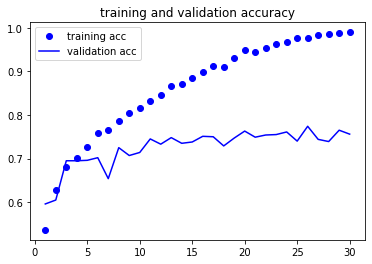

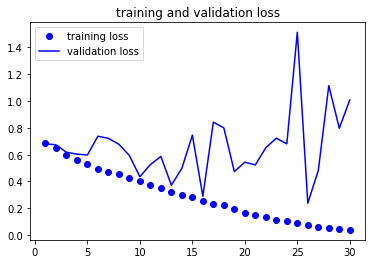

In [47]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

From the graphs above one can see that the accuracy of the training data increases while the accuracy of testing data starts to plateau around the 70%-75% range over time. This type of trend indicates that the model is **overfitting**, meaning that it better recognizes only the trained images and not unseen images. **Underfitting** is when the model is not able to train for new data and unable to recognize the features or generalize them.

A good model is when the model has a good training accuracy and has similar validation accuracy. You can see an example of a good model below. This was achieved by decreasing our learning rate by a third and rebuilding and training the model above.

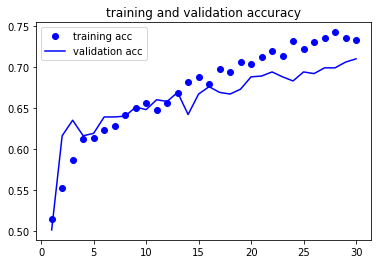

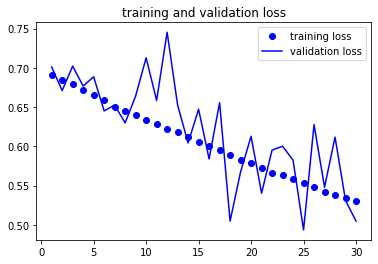

In [42]:
# Do not run, if accidentally run, change the learning rate and rebuilt the model to achieve a similar graph
import matplotlib.pyplot as plt
#The follow graph shows the graph of a good model
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

## Finetuning a pretrained model

Once you have obtained a pretrained model, you would initially **freeze all the trainable layers** of the convolutional base (pretrained model) and train the model (so we train the other connected layers). Once you have trained the model with the frozen convolutional base, we can fine tune the model by **unfreeze** specific block of layers in the convolutional base. Which set of block to unfreeze depends on pretrained model, so it will take some tries, but the idea is to either unfreeze the last few sets of layers or (a set of layers in general) in the convolutional base and train the model again.

After unfreezing some layers we compile the model and train it again. It would help to visualize the accuracy of the training and validation runs, as shown in graph from previous sections. The goal is to not overfit or underfit the model so that it is trained to properly to predict the output if given an input that's not similar to the training examples.

